Общая выручка магазина: 220527 рублей
Товар, который был продан наибольшее количество раз: Globber GS 540
Товар, который принес наибольшую выручку: Roces Eleganza 2 27.5
Отчет:
Количество проданных единиц товара "Termit 200 27.2": 2 | Доля в общей выручке: 1.65%
Количество проданных единиц товара "Street Surfing Ripper": 1 | Доля в общей выручке: 4.72%
Количество проданных единиц товара "Stern Energy 1.0 26": 1 | Доля в общей выручке: 11.83%
Количество проданных единиц товара "Element Seal 8": 3 | Доля в общей выручке: 13.06%
Количество проданных единиц товара "Globber GS 540": 4 | Доля в общей выручке: 19.77%
Количество проданных единиц товара "Roces Eleganza 2 27.5": 2 | Доля в общей выручке: 48.97%


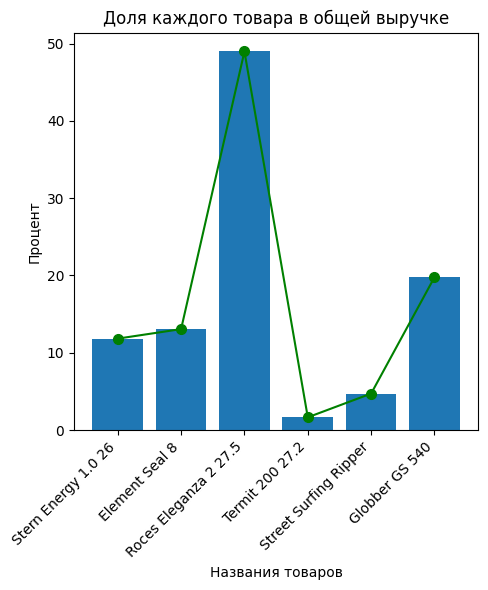

In [ ]:
import csv
import matplotlib.pyplot as plt


def shell_sort(arr):
    n = len(arr)
    gap = n // 2
    while gap > 0:
        for i in range(gap, n):
            temp = arr[i]
            j = i
            while j >= gap and arr[j - gap] > temp:
                arr[j] = arr[j - gap]
                j -= gap
            arr[j] = temp
        gap //= 2
    return arr


try:
    with open('data1.csv', 'r', encoding='windows-1251') as csv_file:
        rows = list(csv.reader(csv_file, delimiter=';'))[1:]
        proceeds = 0
        majority_quantity = max(rows, key=lambda item: int(item[4]))[2]
        largest_revenue = max(rows, key=lambda item: int(item[-1]))[2]
        for row in rows:
            proceeds += int(row[-1])
        print(f'Общая выручка магазина: {proceeds} рублей')
        print(f'Товар, который был продан наибольшее количество раз: {majority_quantity}')
        print(f'Товар, который принес наибольшую выручку: {largest_revenue}')
        print('Отчет:')
        inf = []
        arr = []
        glossary = {}
        for row in rows:
            percent = round(int(row[-1]) * 100 / proceeds, 2)
            arr.append(percent)
            inf.append([percent,
                        f'Количество проданных единиц товара "{row[2]}": {row[4]} | Доля в общей выручке: '])
            glossary.setdefault(row[2], percent)
        arr = shell_sort(arr)
        for i in arr:
            for item in inf:
                if i == item[0]:
                    print(item[1] + str(item[0]) + '%')
except FileNotFoundError:
    print('Файл не был найден')
except:
    print('При анализе произошла ошибка')

plt.figure(figsize=(5, 6))
plt.bar(glossary.keys(), glossary.values())
plt.plot(glossary.keys(), glossary.values(), color='green', marker='o', markersize=7)
plt.xlabel('Названия товаров')
plt.ylabel('Процент')
plt.title('Доля каждого товара в общей выручке')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()